# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('data/alucar.csv')

In [3]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.count()

mes       24
vendas    24
dtype: int64

In [6]:
alucar.isna().sum().sum()

0

In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [10]:
import seaborn as sns

In [11]:
%matplotlib inline

In [12]:
from matplotlib import pyplot as plt

In [13]:
sns.__version__

'0.11.0'

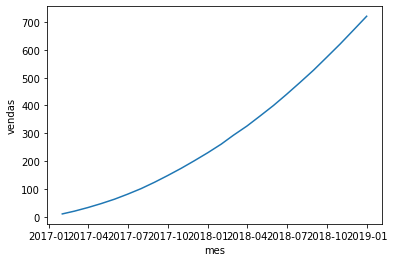

In [14]:
ax = sns.lineplot(x='mes',y='vendas',data=alucar)

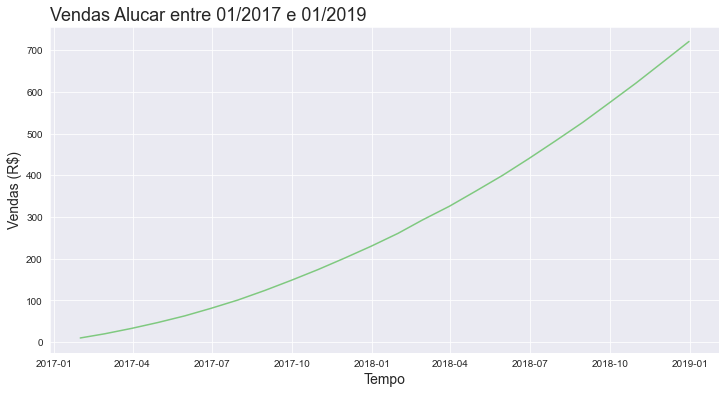

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar entre 01/2017 e 01/2019',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax=ax

In [16]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [17]:
alucar['aumento'] = alucar['vendas'].diff()

In [18]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


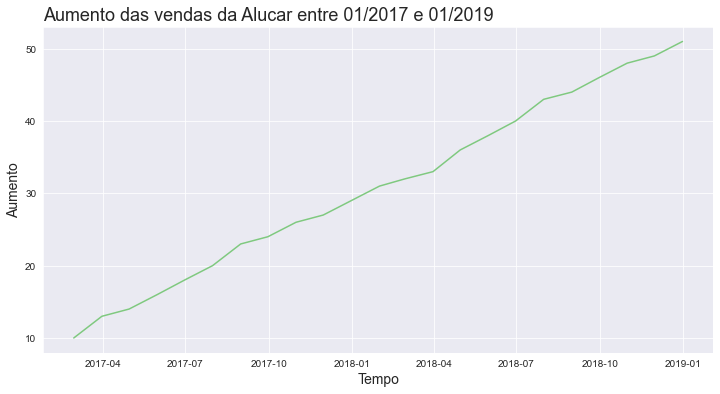

In [20]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='aumento',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar entre 01/2017 e 01/2019',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Aumento',fontsize=14)
ax=ax

In [21]:
def plotar(titulo,labelx,labely,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y,data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely,fontsize=14)
    ax=ax

<AxesSubplot:title={'left':'Aumento das vendas da alucar entre 2017 e 2018'}, xlabel='Tempo', ylabel='Aumento'>

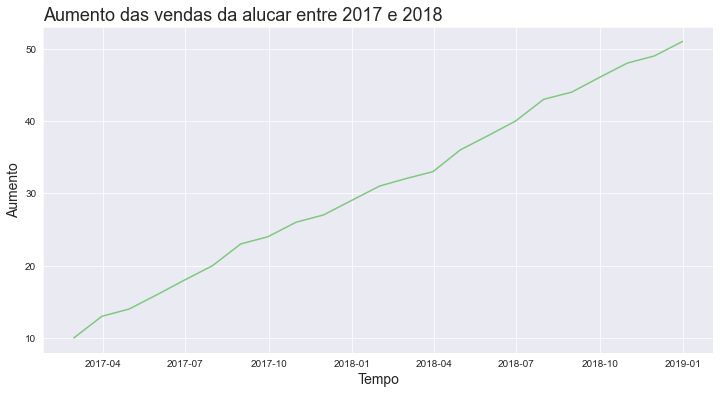

In [23]:
plotar('Aumento das vendas da alucar entre 2017 e 2018','Tempo','Aumento','mes','aumento',alucar)

In [24]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


<AxesSubplot:title={'left':'Aceleração das vendas da alucar de 2017 e 2018'}, xlabel='Tempo', ylabel='Aceleração'>

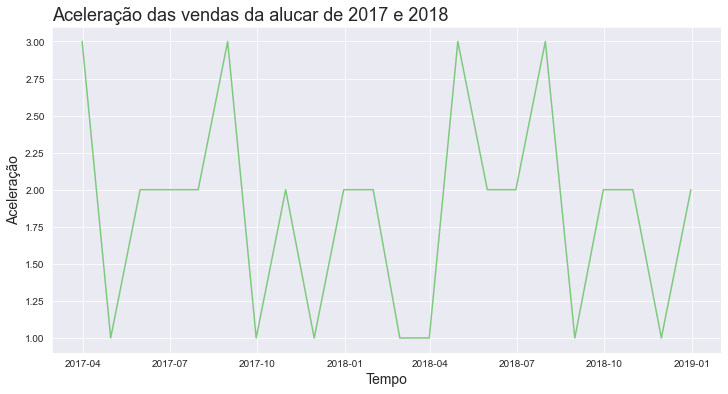

In [25]:
plotar('Aceleração das vendas da alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

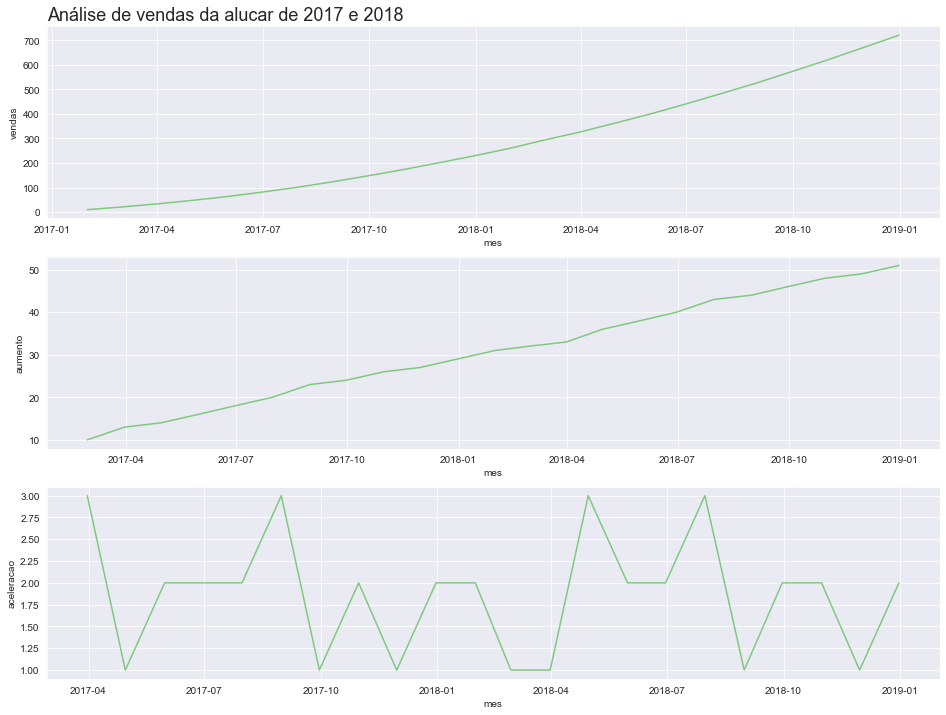

In [27]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao',data=alucar)
ax=ax

In [28]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax=ax

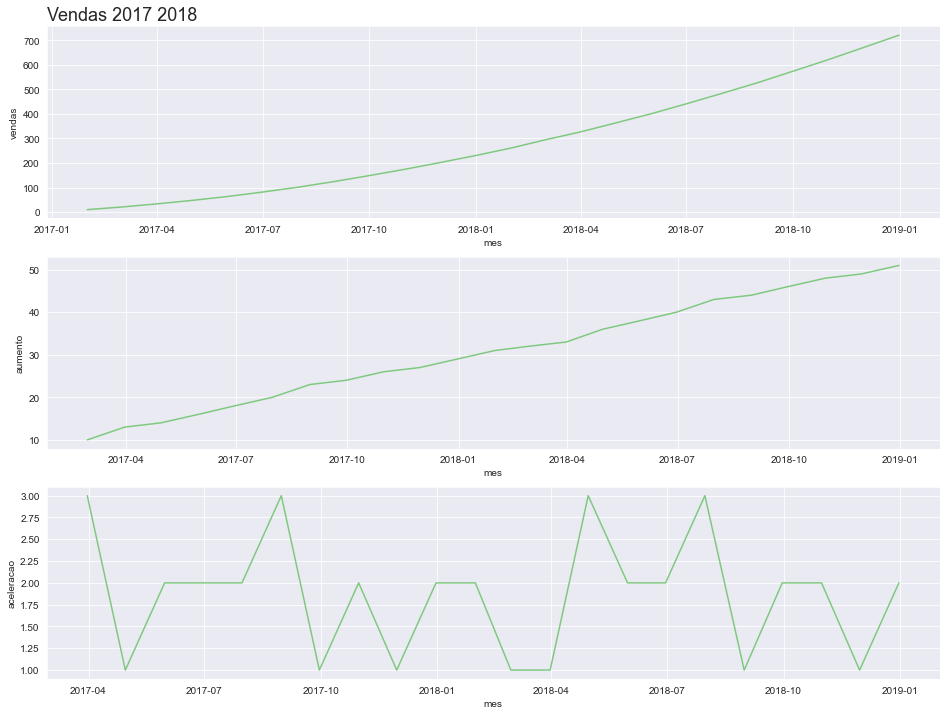

In [29]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Vendas 2017 2018')